<a 
href="https://colab.research.google.com/github/adilo231/Python-for-machine-learning/blob/main/Chap -3- Analyse de donnees et visualisation/1-Pandas (les Bases).ipynb" 
target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas 
pandas est une bibliothèque logicielle écrite pour le langage de programmation Python pour la manipulation et l'analyse de données. En particulier, il propose des structures de données et des opérations de manipulation de tableaux numériques et de séries chronologiques.  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

##  DataFrame Pandas

Données tabulaires bidimensionnelles, variables en taille et potentiellement hétérogènes.
La structure de données contient également des axes étiquetés (lignes et colonnes). Les opérations arithmétiques s'alignent sur les étiquettes de ligne et de colonne. Peut être considéré comme un conteneur de type dict pour les objets Series. La structure de données principale des pandas

### Charger vos données dans un
Les options les plus courantes :
- read_csv
- read_excel


In [3]:
data = pd.read_excel('Datasets/titanic3.xls')

In [4]:
data.shape

(1309, 14)

In [9]:
data.head()
data.head(20)
data.tail()
data.tail(20)
data.sample(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
685,3,0,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.1000,NaN,S,NaN,NaN,"Treherbert, Cardiff, Wales"
238,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S,2,NaN,"St Louis, MO"
409,2,0,"Fox, Mr. Stanley Hubert",male,36.0,0,0,229236,13.0000,NaN,S,NaN,236.0,"Rochester, NY"
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN,6,NaN,"Cincinatti, OH"
150,1,0,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S,NaN,110.0,NaN
209,1,1,"Mock, Mr. Philipp Edmund",male,30.0,1,0,13236,57.7500,C78,C,11,NaN,"New York, NY"
996,3,0,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,NaN,NaN,NaN
589,2,1,"Wells, Mrs. Arthur Henry (""Addie"" Dart Trevaskis)",female,29.0,0,2,29103,23.0000,NaN,S,14,NaN,"Cornwall / Akron, OH"
633,3,0,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S,NaN,NaN,"Sweden Chicago, IL"
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"


In [10]:
data.describe() # Avoir une analyse statistique des donnees

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


### Nettoyer des Datasets 
La fonction "drop" supprime des lignes ou des colonnes en spécifiant les noms d'étiquette et l'axe correspondant, ou en spécifiant directement les noms d'index ou de colonne.

In [11]:
data = data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

Remplir les valeurs vides (NA/NaN) à l'aide de la méthode spécifiée. Dans ce cas, les données vides sont remplies par des moyens.


In [12]:
data2= data.fillna(data['age'].mean())
print(data2.describe())
data2.shape

            pclass     survived          age
count  1309.000000  1309.000000  1309.000000
mean      2.294882     0.381971    29.881135
std       0.837836     0.486055    12.883199
min       1.000000     0.000000     0.166700
25%       2.000000     0.000000    22.000000
50%       3.000000     0.000000    29.881135
75%       3.000000     1.000000    35.000000
max       3.000000     1.000000    80.000000


(1309, 4)

Ou nous les éliminerons tous.

In [13]:
data = data.dropna(axis=0)
print(data.describe())
data.shape

            pclass     survived          age
count  1046.000000  1046.000000  1046.000000
mean      2.207457     0.408222    29.881135
std       0.841497     0.491740    14.413500
min       1.000000     0.000000     0.166700
25%       1.000000     0.000000    21.000000
50%       2.000000     0.000000    28.000000
75%       3.000000     1.000000    39.000000
max       3.000000     1.000000    80.000000


(1046, 4)

<AxesSubplot:>

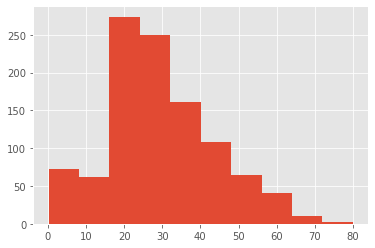

In [14]:
data['age'].hist()

## Statistics avec Groupby() et value_counts()

Une opération groupby implique une combinaison de fractionnement de l'objet, d'application d'une fonction et de combinaison des résultats. Cela peut être utilisé pour regrouper de grandes quantités de données et d'opérations de calcul sur ces groupes.

In [15]:
data.groupby(['sex']).mean()

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


On observe que plus de femmes ont survécu au naufrage du Titanic.

In [16]:
data.groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [17]:
data['pclass'].value_counts()

3    501
1    284
2    261
Name: pclass, dtype: int64

<AxesSubplot:>

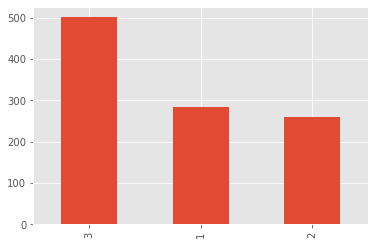

In [19]:
data['pclass'].value_counts().plot.bar()

Nous voulons obtenir le nombre de passagers par classe qui avaient moins de 18 ans.

In [20]:
data[data['age'] < 18]['pclass'].value_counts()

3    106
2     33
1     15
Name: pclass, dtype: int64

In [21]:
data[data['age']>18].groupby(['sex','pclass']).mean()

survived        age
sex    pclass                     
female 1       0.966667  39.358333
       2       0.878049  32.067073
       3       0.436170  29.457447
male   1       0.328671  42.716783
       2       0.087591  34.069343
       3       0.158845  29.799639

## Operation sur les serie
Ndarray unidimensionnel avec étiquettes d'axe (y compris les séries chronologiques).

Les étiquettes n'ont pas besoin d'être uniques, mais doivent être de type hachable. L'objet prend en charge l'indexation basée à la fois sur les entiers et sur les étiquettes et fournit une multitude de méthodes pour effectuer des opérations impliquant l'index. Les méthodes statistiques de ndarray ont été remplacées pour exclure automatiquement les données manquantes (actuellement représentées par NaN).

In [20]:
#data['age'] est une serie
print(data['age'][0:10]) # slicing a serie
data2 = data['age']> 18 # cree un mask
print(data2) 
print(data[data['age']< 18]) # boolean indexing



0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
5    48.0000
6    63.0000
7    39.0000
8    53.0000
9    71.0000
Name: age, dtype: float64
0        True
1       False
2       False
3        True
4        True
        ...  
1301     True
1304    False
1306     True
1307     True
1308     True
Name: age, Length: 1046, dtype: bool
      pclass  survived     sex      age
1          1         1    male   0.9167
2          1         0  female   2.0000
53         1         0    male  17.0000
54         1         1    male  11.0000
55         1         1  female  14.0000
...      ...       ...     ...      ...
1265       3         0  female  10.0000
1275       3         0    male  16.0000
1279       3         0  female  14.0000
1300       3         1  female  15.0000
1304       3         0  female  14.5000

[154 rows x 4 columns]


In [52]:
data.head()

,pclass,survived,sex,age
0,1,1,0,29.0000
1,1,1,1,0.9167
2,1,0,0,2.0000
3,1,0,1,30.0000
4,1,0,0,25.0000


## Méthodes loc et iloc

Les méthodes loc et iloc sont des méthodes Pandas essentielles utilisées pour filtrer, sélectionner et manipuler des données. Ils nous permettent d'accéder à la combinaison souhaitée de lignes et de colonnes.

La principale différence entre eux est la façon dont ils accèdent aux lignes et aux colonnes :

- loc utilise des étiquettes de ligne et de colonne.
- iloc utilise des index de ligne et de colonne.

In [60]:
print(data.iloc[3,3]) # iloc pour la localisation d'index récupère la valeur de la 4ème ligne et de la 4ème colonne
print(data.iloc[0,3]) # récupère la valeur de la première ligne et de la 4ème colonne
print(data.loc[0:2,'age'])

30.0
29.0
0    29.0000
1     0.9167
2     2.0000
Name: age, dtype: float64


## Codefication des donnees
Dans cette partie nous allons créer des catégories et codifier les donnees string avec les fonctions map(), replace() et cat.codes.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
data = pd.read_excel('Datasets/titanic3.xls')
data = data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)
data = data.dropna(axis=0)

In [41]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


Pour créer des catégories d'âge comme indiqué dans l'exemple, il existe deux méthodes, nous utilisons soit l'indexation boléenne, soit la fonction de carte qui est illustrée ci-dessous

In [ ]:
data.loc[data['age']< 20,'age']=0
data.loc[(data['age']>= 20)  & ( data['age']< 30),'age']=1
data.loc[(data['age']>= 30)  &  (data['age']< 40),'age']=2
data.loc[data['age']>= 40,'age']=3
data.head()

In [17]:
data['age'].value_counts()

1.0    344
3.0    245
2.0    232
0.0    225
Name: age, dtype: int64

In [18]:
data.groupby(['age']).mean()

,pclass,survived
age,,
0.0,2.542222,0.471111
1.0,2.436047,0.369186
2.0,2.103448,0.422414
3.0,1.677551,0.391837


La fonction map() applique une fonction sur tous les elements d'une colone.

In [34]:
data['age'].map(lambda x:x+2)


0       31.0000
1        2.9167
2        4.0000
3       32.0000
4       27.0000
         ...   
1301    47.5000
1304    16.5000
1306    28.5000
1307    29.0000
1308    31.0000
Name: age, Length: 1046, dtype: float64

In [31]:
def category_ages(age):
    if age <= 20:
        return '<20 ans'
    elif (age > 20) & (age <= 30):
        return '20-30 ans'
    elif (age > 30) & (age <= 40):
        return '30-40 ans'
    else:
        return '+40 ans'

In [35]:
data['age'] = data['age'].map(category_ages)

In [36]:
data.head()

,pclass,survived,sex,age
0,1,1,female,20-30 ans
1,1,1,male,<20 ans
2,1,0,female,<20 ans
3,1,0,male,20-30 ans
4,1,0,female,20-30 ans


De plus, ici, la colonne sex contient des informations au format String, ce qui est inhabituel et inadapté à une application d'apprentissage automatique. Ainsi, nous utiliserons une codification pour convertir cette colonne au format numérique. Pour cette tâche, il existe trois méthodes adaptées à cette tâche : la fonction map(), replace() et cat.codes

In [38]:
def Conv_sex_to_number(sex):
    if sex == 'female':
        return 0 
    else :
     return 1
data['sex'] = data['sex'].map(Conv_sex_to_number)
data.head()

,pclass,survived,sex,age
0,1,1,0,20-30 ans
1,1,1,1,<20 ans
2,1,0,0,<20 ans
3,1,0,1,20-30 ans
4,1,0,0,20-30 ans


In [43]:
data['sex'] = data['sex'].map({'male':0,'female':1})
data.head()

,pclass,survived,sex,age
0,1,1,1,1.0
1,1,1,0,0.0
2,1,0,1,0.0
3,1,0,0,2.0
4,1,0,1,1.0


In [45]:
data['sex'] = data['sex'].replace(['male','female'],[0,1])
data.head()

,pclass,survived,sex,age
0,1,1,1,29.0000
1,1,1,0,0.9167
2,1,0,1,2.0000
3,1,0,0,30.0000
4,1,0,1,25.0000


In [51]:
data['sex']= data['sex'].astype('category').cat.codes
data.head()

,pclass,survived,sex,age
0,1,1,0,29.0000
1,1,1,1,0.9167
2,1,0,0,2.0000
3,1,0,1,30.0000
4,1,0,0,25.0000
